<a href="https://colab.research.google.com/github/BasitHussain5/Bangala-Text-NLP-Project/blob/main/ml_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

In [ ]:
pip install nltk


In [ ]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import RandomOverSampler
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Bangla NLP Project/Dataset/CleanedDataset.csv")

In [ ]:
df

,Bengali,Label,count
0,কাওকে কবর দিয়ো না তোমা পরিবার বেঁচে না তোমা বা...,fear,29
1,কিন্ত ভয় কিস জানতামনা কিন্ত নানুর কুকুর খারাপ ...,fear,20
2,করোনাভাইরাস সৃষ্ট রোগ কভিড বিশ্বব্যাপী মহামারী...,fear,24
3,চিতা এগো সাহস পায় না দুদিন অনাহারী চিতা কুকুর ...,fear,27
4,রানী মেরি টিউডর প্রেতাত্মা এটাআজ কর অন্ধক বাথর...,fear,12
...,...,...,...
68242,ম্যাচিউর এক আশফাক নিপুন বলে ঈদের নাটক দেখ আগ্র...,disgust,50
68243,সত্য আসলে জান্ পার না পুর নাট মাহাম চরিত্র রুশ...,surprise,71
68244,এভাবে পুরুষে পার যায়কিন্তু চোখ লক্ষ্য ঠিকি বোঝ...,surprise,28
68245,আফরান নিশু বস বস নাটক না সাফা চ্যাট বাল দেখবো না,disgust,17


In [ ]:
df.groupby("Label").describe()

count                                                    
            count       mean        std  min   25%   50%   75%    max
Label                                                                
anger     12356.0  19.081256  18.871227  6.0   9.0  15.0  22.0  552.0
disgust   12663.0  25.743426  18.423632  6.0  16.0  21.0  30.0  343.0
fear       7200.0  21.083750  13.232397  6.0  13.0  19.0  26.0  349.0
joy       12422.0  16.959507  13.486221  6.0   8.0  14.0  21.0  325.0
sadness   14358.0  24.037122  23.725202  6.0  12.0  19.0  28.0  609.0
surprise   9248.0  18.948205  16.611920  6.0  11.0  16.0  22.0  504.0

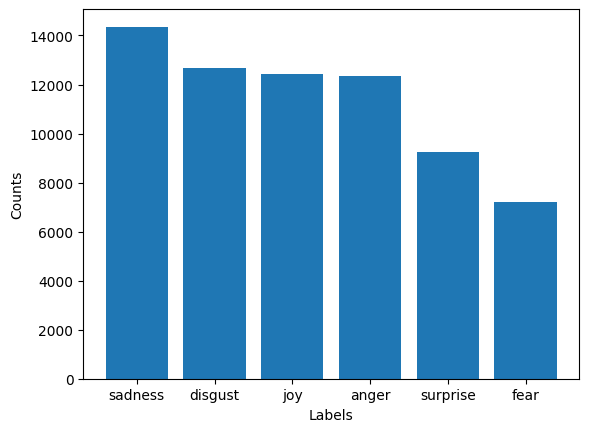

In [ ]:
label_counts = df['Label'].value_counts()

# plt.figure(figsize=(6, ))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Counts')
# plt.title('Distribution of Labels')
plt.show()

In [ ]:
df_resampled = df.copy()

In [ ]:
df_resampled['Bengali'] = df_resampled['Bengali'].astype(str)

### Tokenize the string

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenization function
def tokenize_bengali(text):
    # Tokenize the text and join back into a single string
    return ' '.join(word_tokenize(text))

# Apply tokenization
df_resampled['Bengali'] = df_resampled['Bengali'].apply(tokenize_bengali)

In [ ]:
df_resampled

,Bengali,Label,count
0,কাওকে কবর দিয়ো না তোমা পরিবার বেঁচে না তোমা বা...,fear,29
1,কিন্ত ভয় কিস জানতামনা কিন্ত নানুর কুকুর খারাপ ...,fear,20
2,করোনাভাইরাস সৃষ্ট রোগ কভিড বিশ্বব্যাপী মহামারী...,fear,24
3,চিতা এগো সাহস পায় না দুদিন অনাহারী চিতা কুকুর ...,fear,27
4,রানী মেরি টিউডর প্রেতাত্মা এটাআজ কর অন্ধক বাথর...,fear,12
...,...,...,...
68242,ম্যাচিউর এক আশফাক নিপুন বলে ঈদের নাটক দেখ আগ্র...,disgust,50
68243,সত্য আসলে জান্ পার না পুর নাট মাহাম চরিত্র রুশ...,surprise,71
68244,এভাবে পুরুষে পার যায়কিন্তু চোখ লক্ষ্য ঠিকি বোঝ...,surprise,28
68245,আফরান নিশু বস বস নাটক না সাফা চ্যাট বাল দেখবো না,disgust,17


In [ ]:
print(df_resampled)

                                                 Bengali     Label  count
0      কাওকে কবর দিয়ো না তোমা পরিবার বেঁচে না তোমা বা...      fear     29
1      কিন্ত ভয় কিস জানতামনা কিন্ত নানুর কুকুর খারাপ ...      fear     20
2      করোনাভাইরাস সৃষ্ট রোগ কভিড বিশ্বব্যাপী মহামারী...      fear     24
3      চিতা এগো সাহস পায় না দুদিন অনাহারী চিতা কুকুর ...      fear     27
4      রানী মেরি টিউডর প্রেতাত্মা এটাআজ কর অন্ধক বাথর...      fear     12
...                                                  ...       ...    ...
68242  ম্যাচিউর এক আশফাক নিপুন বলে ঈদের নাটক দেখ আগ্র...   disgust     50
68243  সত্য আসলে জান্ পার না পুর নাট মাহাম চরিত্র রুশ...  surprise     71
68244  এভাবে পুরুষে পার যায়কিন্তু চোখ লক্ষ্য ঠিকি বোঝ...  surprise     28
68245   আফরান নিশু বস বস নাটক না সাফা চ্যাট বাল দেখবো না   disgust     17
68246  নাটক এগুলা রহস্য মুভির স্বাদ পেল অপি করিম আগ র...  surprise     18

[68247 rows x 3 columns]


## Model Building

### TF-IDF

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import nltk

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled['Bengali'], df_resampled['Label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       anger       0.33      0.35      0.34      2443
     disgust       0.43      0.43      0.43      2573
        fear       0.59      0.47      0.52      1443
         joy       0.50      0.55      0.52      2441
     sadness       0.43      0.45      0.44      2879
    surprise       0.47      0.42      0.45      1871

    accuracy                           0.44     13650
   macro avg       0.46      0.44      0.45     13650
weighted avg       0.45      0.44      0.44     13650



<Axes: >

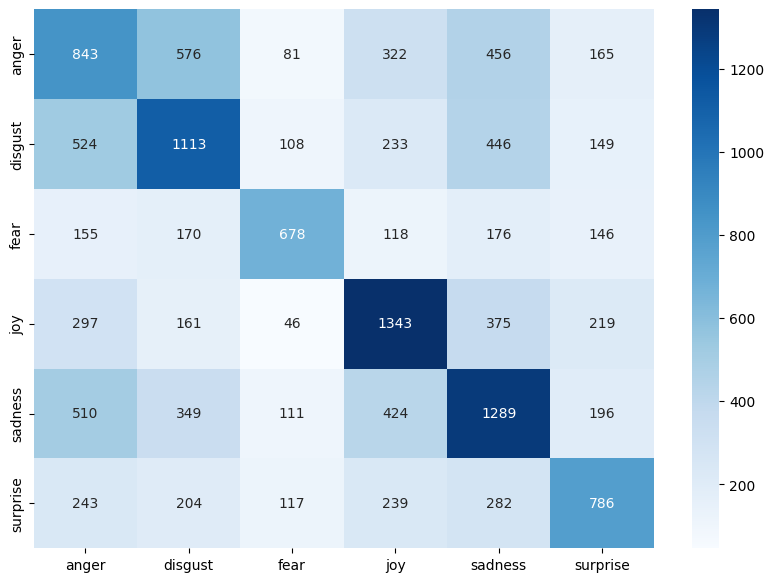

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
             xticklabels=model.classes_, yticklabels=model.classes_)


In [ ]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test_vectorized)

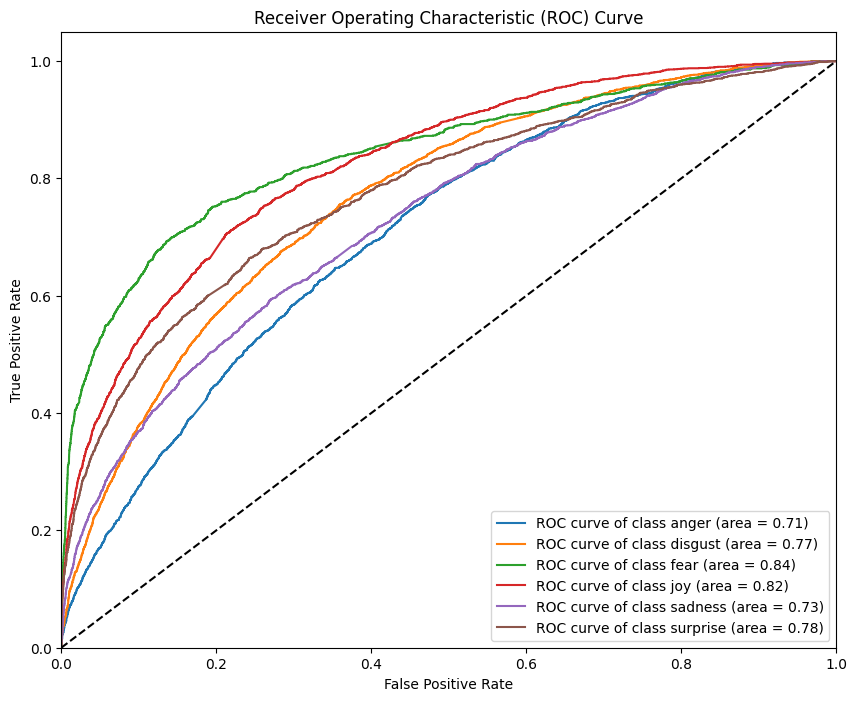

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.36      0.26      0.30      2443
     disgust       0.39      0.49      0.43      2573
        fear       0.75      0.33      0.46      1443
         joy       0.51      0.52      0.52      2441
     sadness       0.35      0.57      0.44      2879
    surprise       0.58      0.30      0.39      1871

    accuracy                           0.43     13650
   macro avg       0.49      0.41      0.42     13650
weighted avg       0.46      0.43      0.42     13650



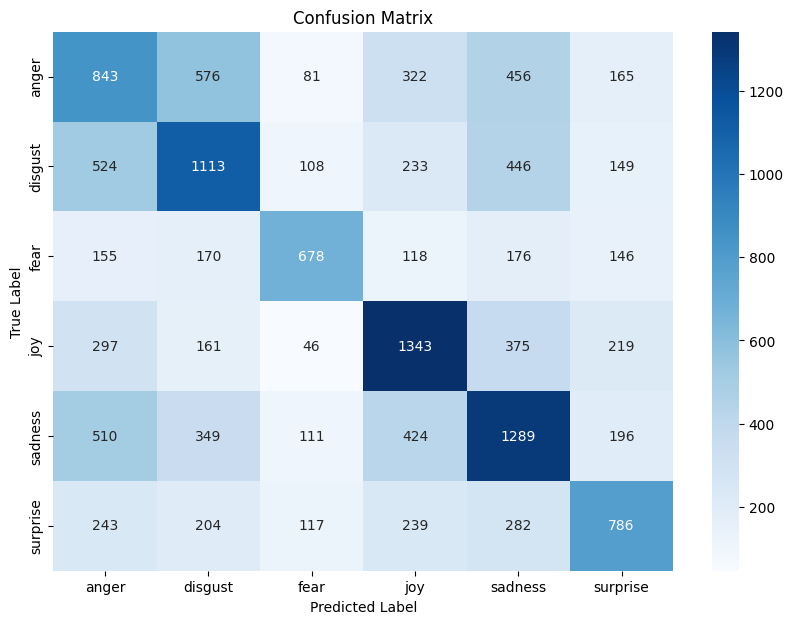

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

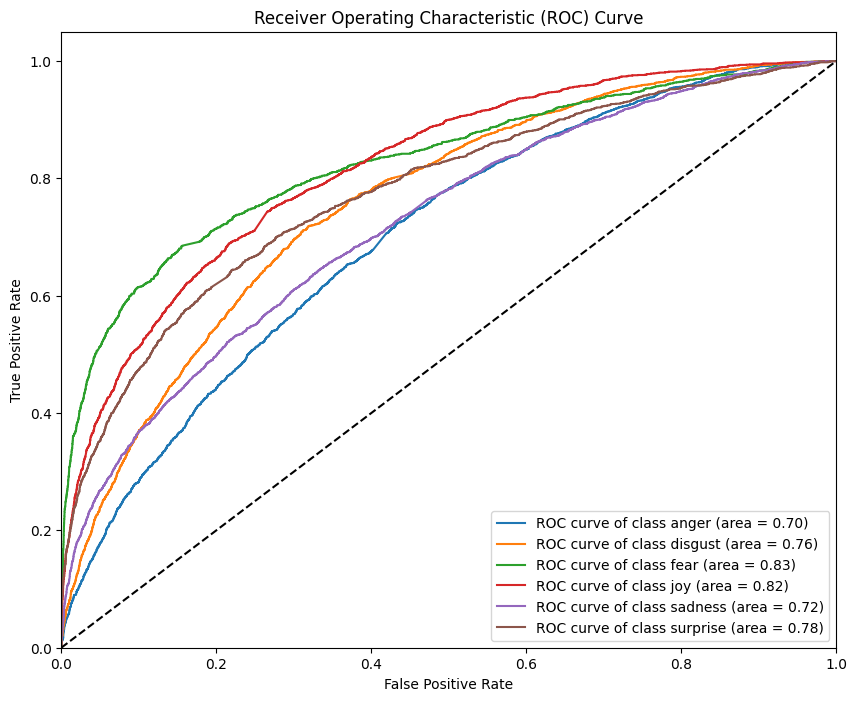

In [ ]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test_vectorized)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.28      0.42      0.34      2443
     disgust       0.41      0.38      0.40      2573
        fear       0.69      0.42      0.52      1443
         joy       0.49      0.45      0.47      2441
     sadness       0.38      0.47      0.42      2879
    surprise       0.54      0.26      0.35      1871

    accuracy                           0.41     13650
   macro avg       0.46      0.40      0.42     13650
weighted avg       0.44      0.41      0.41     13650



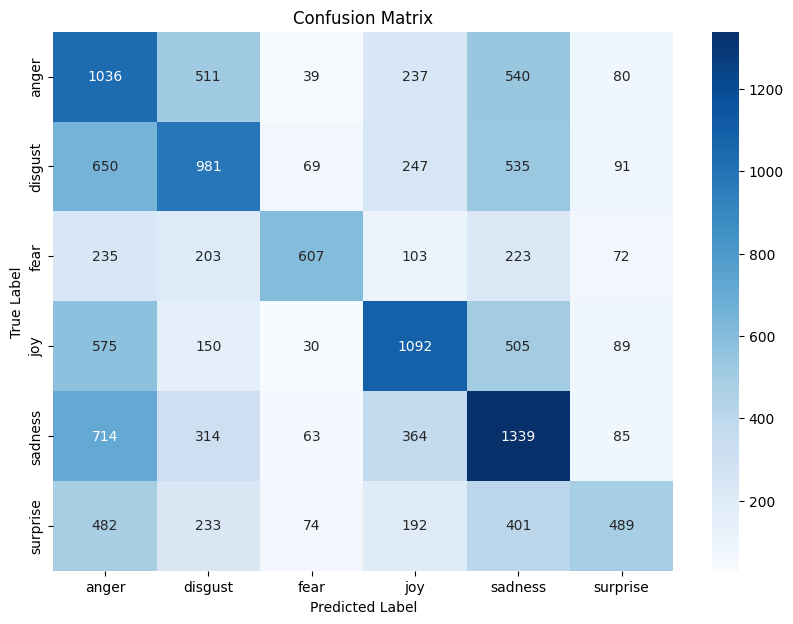

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

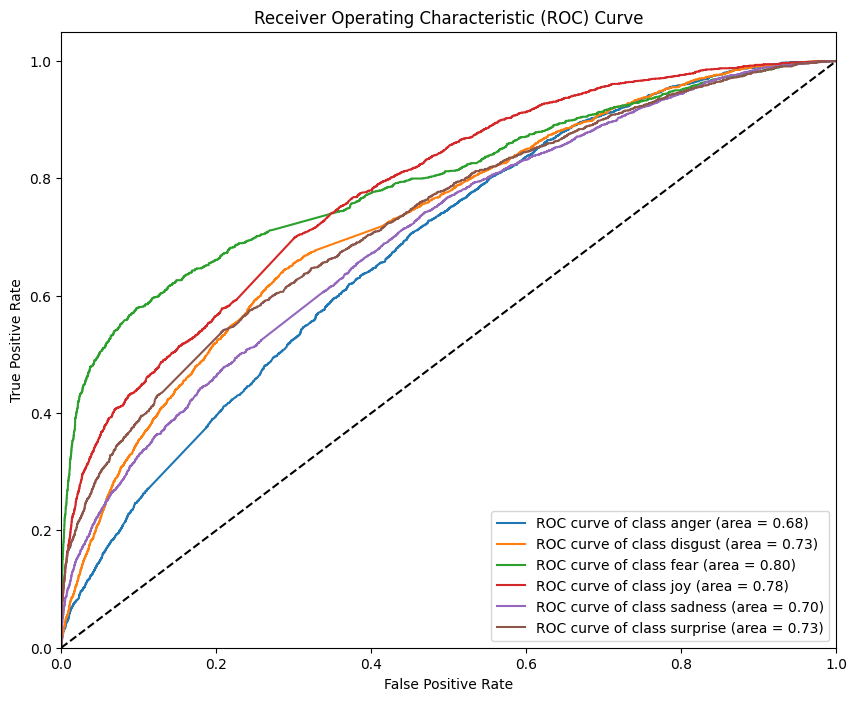

In [ ]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test_vectorized)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()